<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [ ]:
print(df.shape, end='\n\n')
print(df.columns, end='\n\n')
print(df.dtypes, end='\n\n')
print(df.isnull().sum(), end='\n\n')
df.describe()

(104, 14)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64



,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [ ]:
print(df['case'].nunique())

104


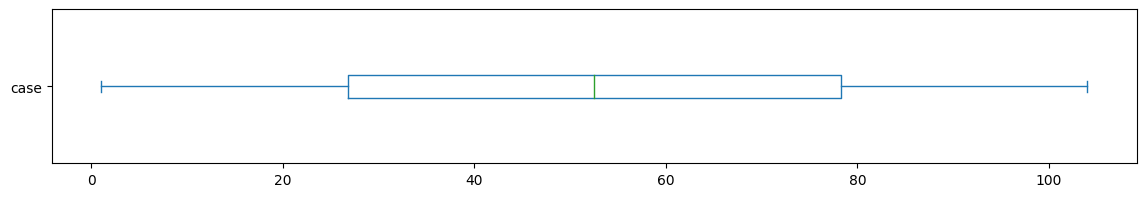

In [ ]:
df['case'].plot(kind='box', vert=False, figsize=(14,2))
plt.show()

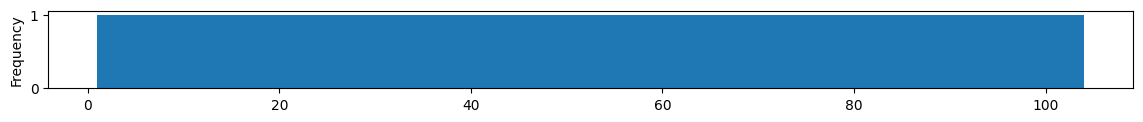

In [ ]:
df['case'].plot(kind='hist',  bins=104, figsize=(14,1))
plt.show()

In [ ]:
df.loc[df['case'] != df.index + 1]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [ ]:
# Поле case фактично є номером по порядку і дорівнює index+1

# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [ ]:
for column_name in df.columns:
    if df.dtypes[column_name] in ("object", "datetime64[ns]"):
      continue

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[column_name] < lower) | (df[column_name] > upper)]

    print(column_name, '\n', outliers)


case 
 Empty DataFrame
Columns: [case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []
site 
 Empty DataFrame
Columns: [case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []
age 
 Empty DataFrame
Columns: [case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []
hdlngth 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
54    55     4  other   m  2.0    103.1    63.2      92.5   38.0      72.5   
58    59     4  other   m  2.0    102.5    62.8      96.0   40.0      73.2   
72    73     5  other   m  1.0     82.5    52.3      82.0   36.5      65.7   

    earconch   eye  chest  belly  
54      44.9  16.4   30.5   36.0  
58      44.5  14.7   32.0   36.0  
72      44.7  16.0   23.5   28.0  
skullw 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
16    17     1    Vic 

In [ ]:
num_df = df.select_dtypes(include='number')
q1 = num_df.quantile(q=0.25)
q3 = num_df.quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
mask = (num_df >= lower) & (num_df <= upper)
df[mask.all(axis=1)].shape

(85, 14)

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума